In [165]:
!python -V

Python 3.7.0


In [166]:
#  pandas 2.0.3
#  matplotlib 3.7.2
#  scikit-learn 1.3.0
#  numpy 1.25.2

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error

In [168]:
# initialise the data frame
file_path = r"1000_companies.csv"
data = pd.read_csv(file_path)
data.head()
data.drop(['State'], axis=1)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.800,471784.1000,192261.83000
1,162597.70,151377.590,443898.5300,191792.06000
2,153441.51,101145.550,407934.5400,191050.39000
3,144372.41,118671.850,383199.6200,182901.99000
4,142107.34,91391.770,366168.4200,166187.94000
...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251
996,134970.00,130390.080,329204.0228,164336.60550
997,100275.47,241926.310,227142.8200,413956.48000
998,128456.23,321652.140,281692.3200,333962.19000


In [169]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [170]:
#Cleaning data
data.replace(0, np.nan, inplace=True)
df_cleaned = data.dropna()
data = df_cleaned.copy()

In [171]:
columns_to_convert = ['R&D Spend', 'Administration', 'Marketing Spend','Profit']


In [172]:
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [173]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,996.000000,996.000000,996.000000,996.000000
mean,81909.603865,122998.222522,227068.157991,119809.712104
std,46414.973531,12390.387112,90732.334995,42692.751703
min,1000.230000,51283.140000,1903.930000,49490.750000
25%,43354.500000,116640.684850,151855.708750,86191.797330
50%,80140.000000,122421.612150,225095.773400,117673.075050
75%,124727.750000,129117.186825,309128.511625,155762.232225
max,165349.200000,321652.140000,471784.100000,476485.430000


In [174]:
#let us plot the given data

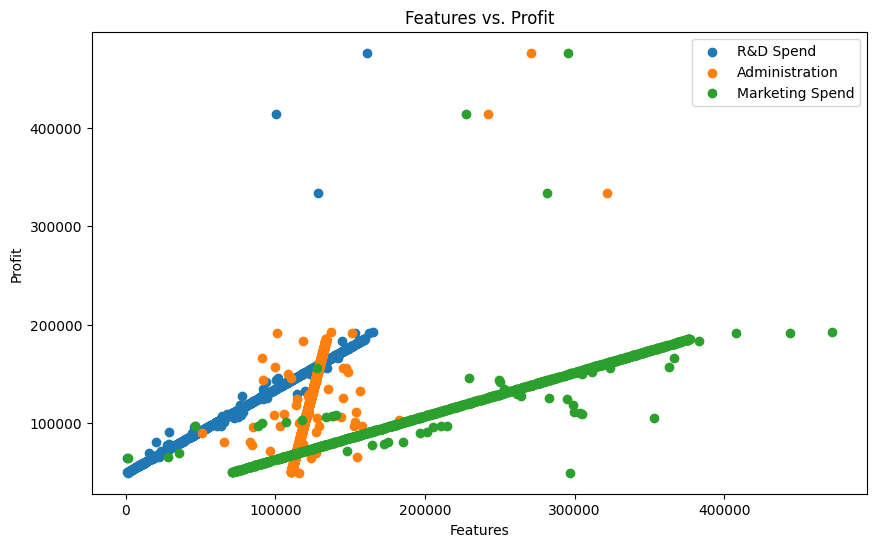

In [175]:
plt.figure(figsize=(10, 6))
plt.scatter(data['R&D Spend'], data['Profit'], label='R&D Spend')
plt.scatter(data['Administration'], data['Profit'], label='Administration')
plt.scatter(data['Marketing Spend'], data['Profit'], label='Marketing Spend')
plt.xlabel('Features')
plt.ylabel('Profit')
plt.title('Features vs. Profit')
plt.legend()
plt.savefig('data.png')
plt.show()

In [176]:
# Convert specific columns to numeric before calculating z-scores
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [177]:
##LEt us find outliers

In [178]:
# z_scores = np.abs(stats.zscore(data))
# threshold = 3

# print(z_scores.head())
# outlier_indices = np.where(z_scores > threshold)

# print("Outlier Indices:", outlier_indices)


In [179]:
# Simple linear regression
# R&D vs Profit 

In [180]:
#Set features and targets
X = data[['R&D Spend']]  
y = data['Profit']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # spliting the data into 4 : 1

#Linear regression model
model = LinearRegression()     

#Fit the model
model.fit(X_train, y_train)    

#Prediction
y_pred = model.predict(X_test)

# Evaluate
r_squared = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print('R-Squared', r_squared)
print('MSE ' + str(mse))
print('RMSE  ' + str(math.sqrt(mse)))
print('AME   ' +str(mean_absolute_error(y_test, y_pred)))


R-Squared 0.9975046649897035
MSE 3954865.945767175
RMSE  1988.6844761719178
AME   1236.395812396308


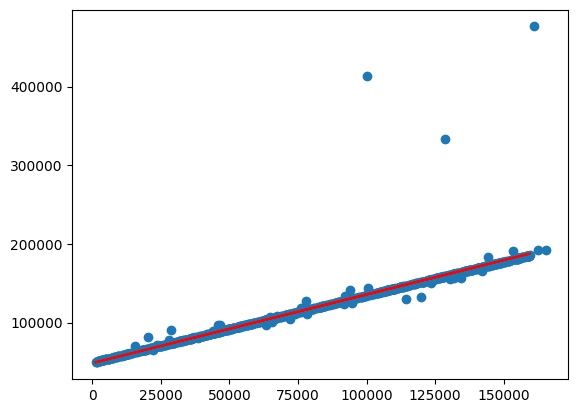

In [181]:
plt.scatter(X_train, y_train) 

plt.plot(X_test, y_pred, color = 'r') 

plt.show()

15585.94486498677
-8496.524746988798


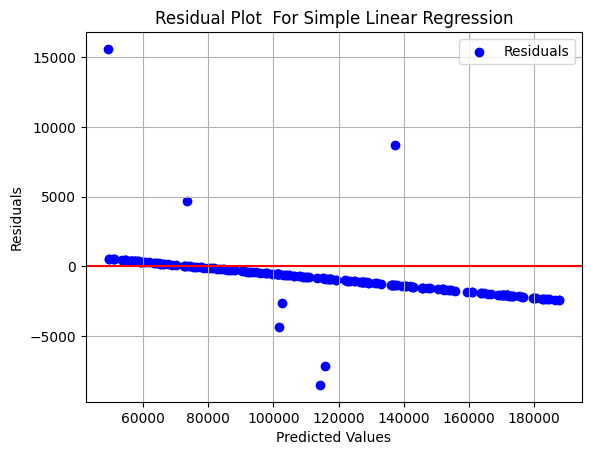

In [182]:
#Residual Analysis
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='b', label='Residuals')
plt.axhline(y=0, color='red')

#labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.title("Residual Plot  For Simple Linear Regression")
plt.legend()
plt.savefig('Simple_Linear_R&D.png')
print(max(residuals))
print(min(residuals))

In [183]:
##Adminstration and profit

In [184]:
#Set features and targets
X = data[['Administration']]  
y = data['Profit']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # spliting the data into 4 : 1

#Linear regression model
model = LinearRegression()     

#Fit the model
model.fit(X_train, y_train)    

#Prediction
y_pred = model.predict(X_test)

# Evaluing the model
r_squared = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print('R-Squared', r_squared)
print('MSE ' + str(mse))
print('RMSE  ' + str(math.sqrt(mse)))
print('AME   ' +str(mean_absolute_error(y_test, y_pred)))


R-Squared 0.5906913043446458
MSE 648714908.0481111
RMSE  25469.8823720902
AME   21369.86658655234


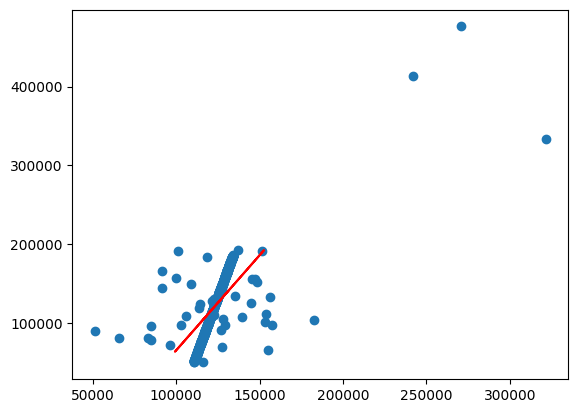

In [185]:
plt.scatter(X_train, y_train) 

plt.plot(X_test, y_pred, color = 'r') 

plt.show()

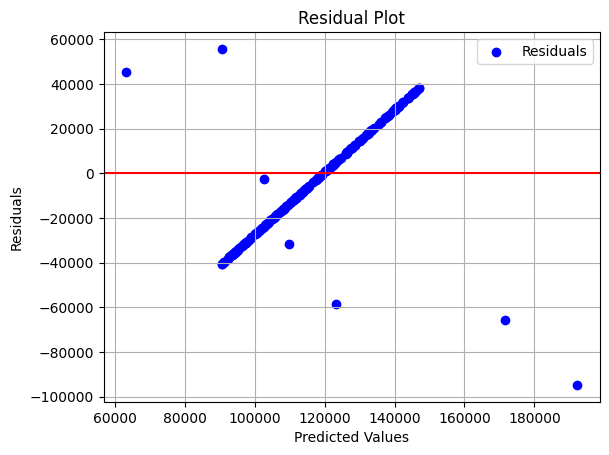

In [186]:
#Residual analysis
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='b', label='Residuals')
plt.axhline(y=0, color='red')

#labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.grid()
plt.savefig('Simple_Linear_2.png')


In [187]:
## Marketing And profit

In [188]:
#Set features and targets
X = data[['Marketing Spend']]  
y = data['Profit']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # spliting the data into 4 : 1

#Linear regression model
model = LinearRegression()     

#Fit the model
model.fit(X_train, y_train)    

#Prediction
y_pred = model.predict(X_test)

# Evaluate
r_squared = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print('R-Squared', r_squared)
print('MSE ' + str(mse))
print('RMSE  ' + str(math.sqrt(mse)))
print('AME   ' +str(mean_absolute_error(y_test, y_pred)))

R-Squared 0.9766847107975914
MSE 36952490.50802252
RMSE  6078.856019681871
AME   1961.489747257929


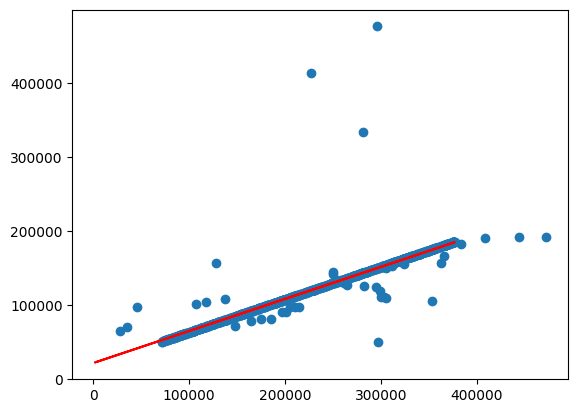

In [189]:
plt.scatter(X_train, y_train) 

plt.plot(X_test, y_pred, color = 'r') 

plt.show()

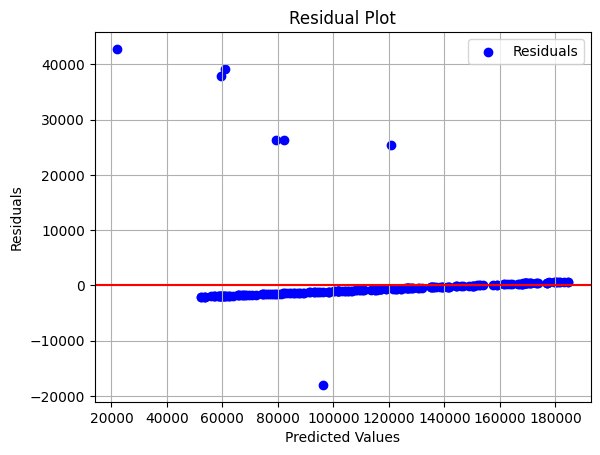

In [190]:
#Residual Analysis
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='b', label='Residuals')
plt.axhline(y=0, color='red')

#labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid()
plt.savefig('Simple_Linear_3.png')
plt.legend()


In [191]:
# multiple regression

In [192]:
#Set features and targets
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data['Profit']      


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # spliting the data into 4 : 1

#Linear regression model
model = LinearRegression()     

#Fit the model
model.fit(X_train, y_train)    

#Prediction
y_pred = model.predict(X_test)

# Evaluate the model
r_squared = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print('R-Squared', r_squared)
print('MSE ' + str(mse))
print('RMSE  ' + str(math.sqrt(mse)))
print('AME   ' +str(mean_absolute_error(y_test, y_pred)))


R-Squared 0.9894355203427718
MSE 16743683.977790523
RMSE  4091.904688258333
AME   1002.9630602089503


836   -727.596347
974   -515.237700
100   -105.140265
591   -413.512148
454    -59.435816
          ...    
494    110.317988
859   -112.773580
69    -834.579466
145   -599.019498
831     -1.948225
Name: Profit, Length: 200, dtype: float64


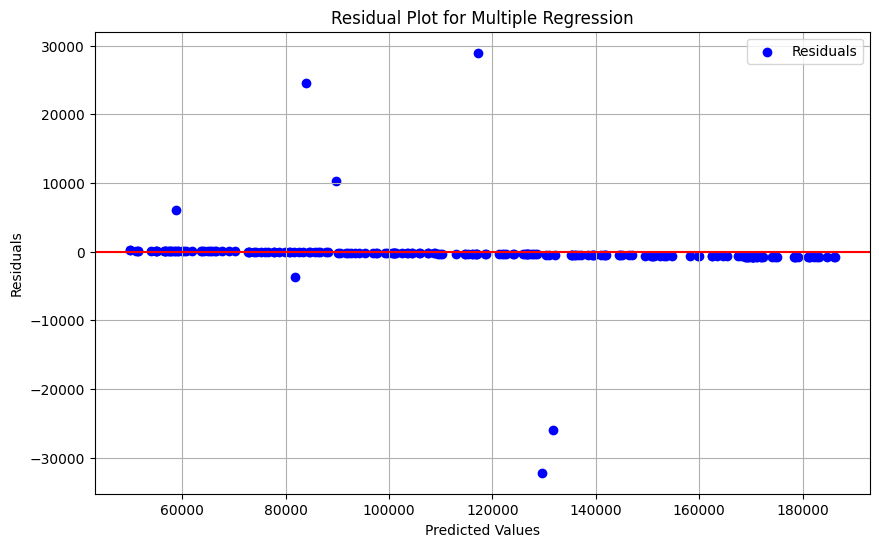

In [193]:
#Residual Analysis
residuals = y_test - y_pred

# Creating a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='b', label='Residuals')
plt.axhline(y=0, color='red') 

# Labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Multiple Regression")
plt.legend()
plt.grid(True)
print(residuals)
plt.savefig('Multiple_Regression.png')

In [194]:
#polynomial regression

In [195]:
X = data[['R&D Spend', 'Marketing Spend', 'Administration']]  # Multiple features (X)
y = data['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# assigning polynomial degree
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Linear regression model with polynomial features
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_poly, y_train)

# Predict the target varible
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)


r_squared = model.score(X_test_poly, y_test)

print('R-Squared', r_squared)
print('MSE: ' + str(mse))
print('RMSE:  ' + str(math.sqrt(mse)))
print('AME:   ' +str(mean_absolute_error(y_test, y_pred)))

R-Squared 0.9777708660846924
MSE: 35231038.863635905
RMSE:  5935.574012986099
AME:   1257.1201449920252


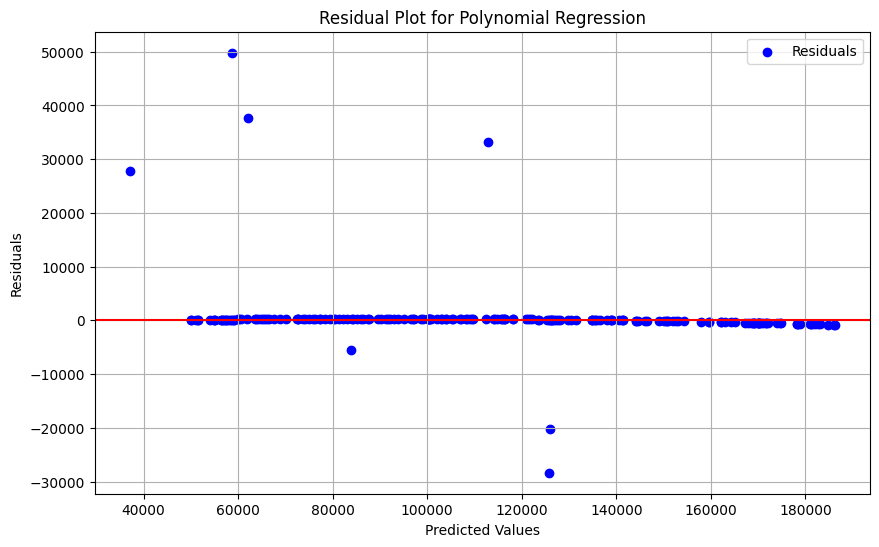

In [196]:
#Residual analysis
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='b', label='Residuals')
plt.axhline(y=0, color='red') 

# Labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Polynomial Regression")
plt.legend()
plt.grid(True)
plt.savefig('Polynomial_Regression.png')

In [197]:
##RIDGE REGRESSION

In [198]:
from sklearn.linear_model import Ridge

In [199]:
from sklearn.linear_model import Lasso
from sklearn import linear_model

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regression model
alpha = 2.0  # Regularization strength (hyperparameter)
model = Ridge(alpha=alpha)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

r_squared = model.score(X_test, y_test)

print('R-Squared', r_squared)
print('MSE: ' + str(mse))
print('RMSE:  ' + str(math.sqrt(mse)))
print('AME:   ' +str(mean_absolute_error(y_test, y_pred)))

R-Squared 0.9894355203431013
MSE: 16743683.97726833
RMSE:  4091.9046881945246
AME:   1002.963060200833


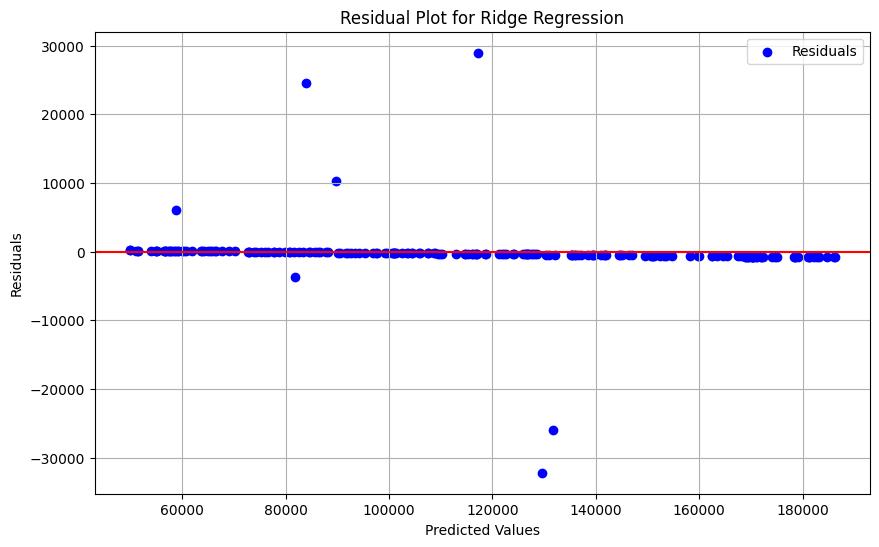

In [201]:
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='b', label='Residuals')
plt.axhline(y=0, color='red')  # Line at y=0

# Labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Ridge Regression")
plt.legend()
plt.grid(True)
plt.savefig('Ridge_Regression.png')
plt.show()


In [202]:
#LASSO REGRESSION

In [203]:
# Assuming 'data' is your DataFrame
X = data[['R&D Spend', 'Marketing Spend', 'Administration']]  # Multiple features (X)
y = data['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso regression model
alpha = 1.0  # Regularization strength (hyperparameter)
model = Lasso(alpha=alpha)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print('R-Squared:', r_squared)
print('MSE: ' + str(mse))
print('RMSE:  ' + str(math.sqrt(mse)))
print('AME:  ' +str(mean_absolute_error(y_test, y_pred)))



R-Squared: 0.9894355205343695
MSE: 16743683.674126802
RMSE:  4091.904651152908
AME:  1002.9630649234671


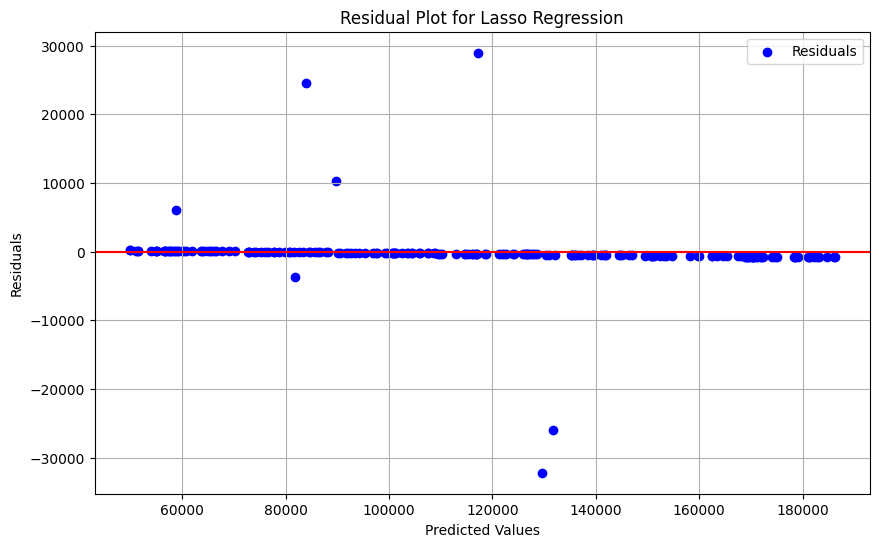

In [204]:
# Calculate residuals
residuals = y_test - y_pred


# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='b', label='Residuals')
plt.axhline(y=0, color='red')  # Line at y=0

# Labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Lasso Regression")
plt.legend()
plt.grid(True)
plt.savefig('Lasso_regression.png')

plt.show()

In [205]:
#elasticnet regression

In [206]:
from sklearn.linear_model import ElasticNet

In [207]:
X = data[['R&D Spend', 'Marketing Spend', 'Administration']]  # Multiple features (X)
y = data['Profit']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Elastic Net regression model
alpha = 1.0  # Regularization strength (hyperparameter)  
model = ElasticNet(alpha=alpha, l1_ratio = 0.5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)


# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print('R-Squared: ', r_squared)
print('MSE: ' + str(mse))
print('RMSE:  ' + str(math.sqrt(mse)))
print('AME:   ' +str(mean_absolute_error(y_test, y_pred)))

R-Squared:  0.9894355205032096
MSE: 16743683.72351213
RMSE:  4091.904657187424
AME:   1002.9630608158585


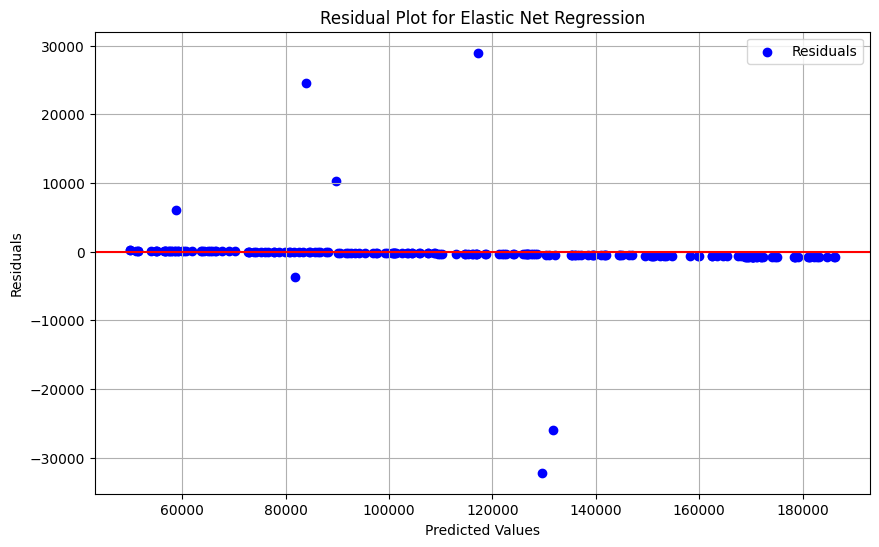

In [208]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='b', label='Residuals')
plt.axhline(y=0, color='red')  # Line at y=0

# Labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Elastic Net Regression")
plt.legend()
plt.grid(True)
plt.savefig('ElasticNet.png')
plt.show()

In [209]:
#PCA REGRESSION

In [210]:
from sklearn.decomposition import PCA

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of principal components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Linear regression on principal components
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_pca, y_train)

# Prediction
y_pred = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test_pca, y_test)

print('R-Squared: ', r_squared)
print('MSE: ' + str(mse))
print('RMSE:  ' + str(math.sqrt(mse)))
print('AME:   ' +str(mean_absolute_error(y_test, y_pred)))

R-Squared:  0.9896109478116613
MSE: 16465648.31532429
RMSE:  4057.7885991416915
AME:   1012.7094140663158


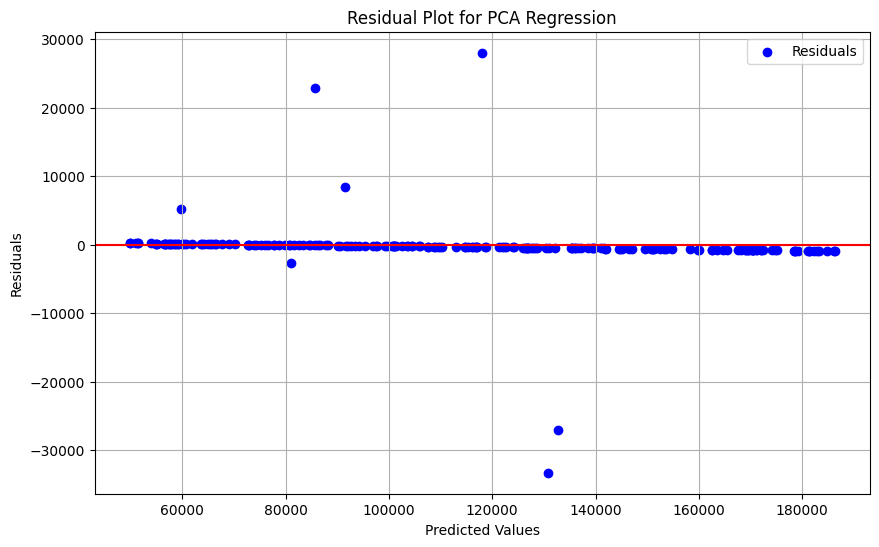

In [212]:
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='b', label='Residuals')
plt.axhline(y=0, color='red')  # Line at y=0

# Labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for PCA Regression")
plt.legend()
plt.grid(True)
plt.savefig('PCA.png')
plt.show()

In [213]:
#Support Vector regression

In [214]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X = data[['R&D Spend', 'Marketing Spend', 'Administration']]  # Multiple features (X)
y = data['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Support Vector Regression
model = SVR(kernel='linear')  # various kernel choose any 1 - linear, polynomial, rbf, sigmoid

# Fit the model to the training data
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluating the model with test dataset
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print('R-Squared: ', r_squared)
print('MSE: ' + str(mse))
print('RMSE:  ' + str(math.sqrt(mse)))
print('AME:   ' +str(mean_absolute_error(y_test, y_pred)))

R-Squared:  0.9567516585235813
MSE: 68544460.8480339
RMSE:  8279.158220980797
AME:   6196.415993910636


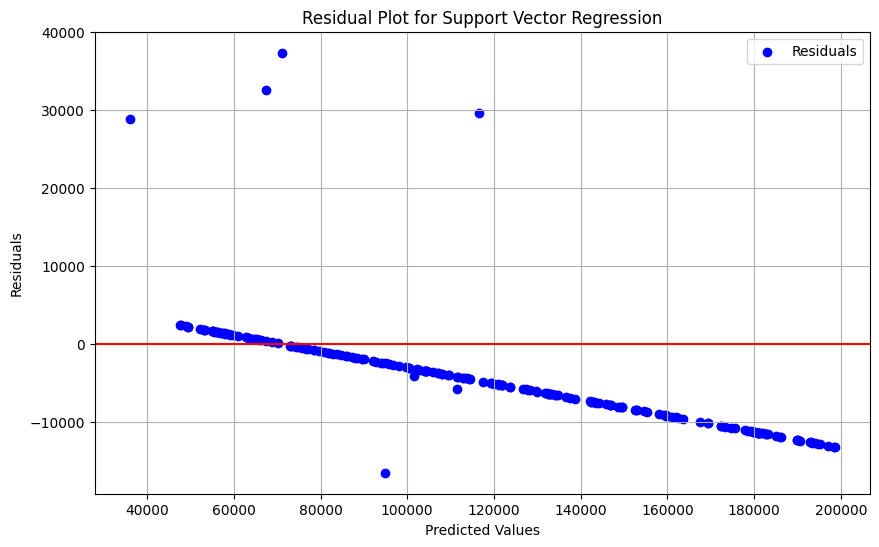

In [215]:
#Residual analysis
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='b', label='Residuals')
plt.axhline(y=0, color='red')  # Line at y=0

# Labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Support Vector Regression")
plt.legend()
plt.grid(True)
plt.savefig('SVR.png')
plt.show()

In [216]:
#PCR

In [217]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset (replace 'data.csv' with your actual file path)

# Separate features and target variable
X = data.drop(columns=['Profit', 'State'])
y = data['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
n_components = 2  # Choose the number of principal components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model on the PCA-transformed training data
model.fit(X_train_pca, y_train)

# Predict on the PCA-transformed testing data
y_pred = model.predict(X_test_pca)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 18996712.74952516


In [218]:
r_squared = model.score(X_test_pca, y_test)

print(r_squared)


0.9880139648082962


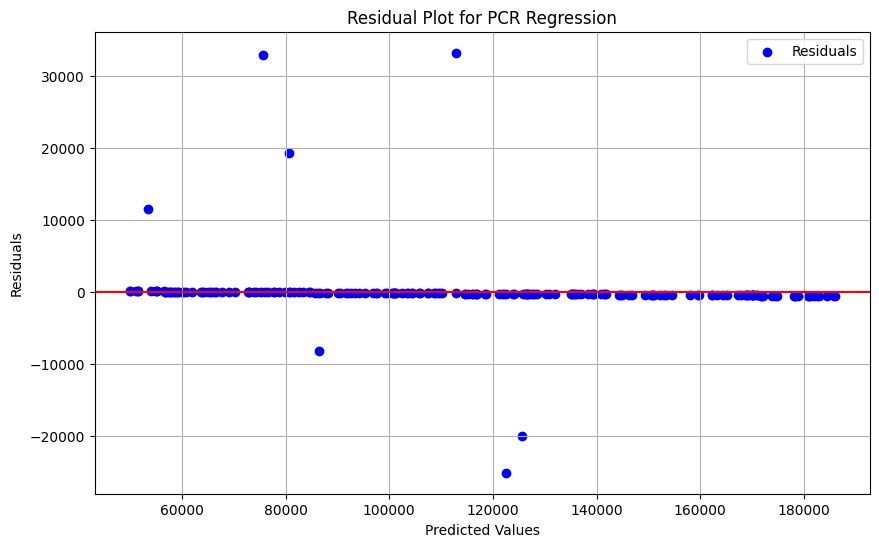

In [219]:
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='b', label='Residuals')
plt.axhline(y=0, color='red')  # Line at y=0

# Labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for PCR Regression")
plt.legend()
plt.grid(True)
plt.savefig('PCR.png')

In [220]:
## RANDOM FOREST REGRESSION

In [221]:
from sklearn.ensemble import RandomForestRegressor

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# EVvaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print('R-Squared: ', r_squared)
print('MSE: ' + str(mse))
print('RMSE:  ' + str(math.sqrt(mse)))
print('AME:   ' +str(mean_absolute_error(y_test, y_pred)))


R-Squared:  0.9987080263272191
MSE: 2047653.9864287686
RMSE:  1430.9626083265657
AME:   324.43020567100154


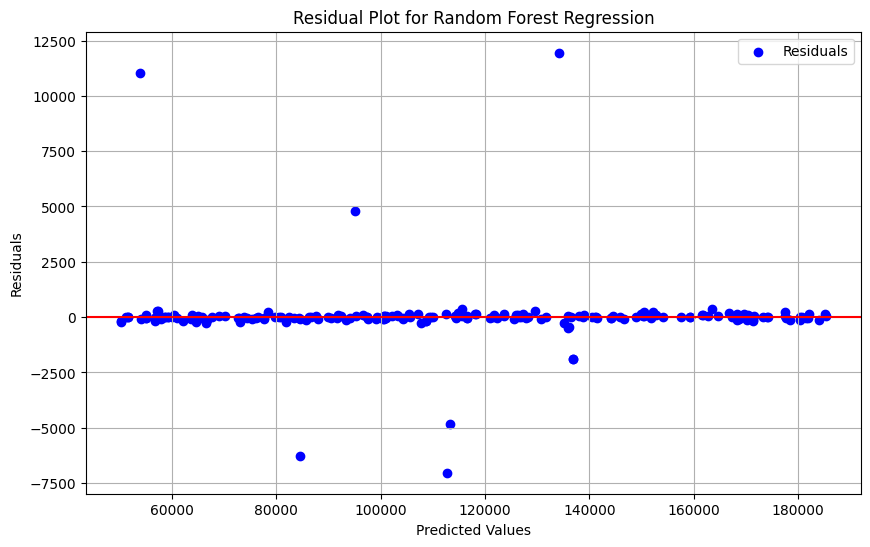

In [223]:
#Residual analysis
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='b', label='Residuals')
plt.axhline(y=0, color='red')  # Line at y=0

# Labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random Forest Regression")
plt.legend()
plt.grid(True)
plt.savefig('Random_Forest.png') 